In [167]:
import numpy as np
import pandas as pd
#import gensim
import matplotlib.pyplot as plt
import seaborn as sns
#from nltk.tokenize import word_tokenize
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pyarrow.parquet as pq
import geopandas

In [3]:
data2019=pd.read_pickle("data2019.pkl", compression='infer')

In [4]:
data2019

,quoteID,quotation,speaker,date,numOccurrences
1015,2019-09-26-057277,It's managing those zillions of microbial cell...,Thomas Crowther,2019-09-26 11:00:45,1
2314,2019-03-28-015294,Climate change is the single most important is...,Nicola Sturgeon,2019-03-28 14:55:43,1
2316,2019-06-28-012580,Climate change represents an existential threa...,Kamala Harris,2019-06-28 04:10:00,1
3028,2019-05-08-019902,"Even for Australians who can afford to pay, ge...",Dr Karl,2019-05-08 22:36:00,5
5577,2019-01-20-042295,The challenges this year will include global t...,Nguyen Xuan Phuc,2019-01-20 03:40:26,7
...,...,...,...,...,...
21759158,2019-06-06-003946,Air pollution is there. But it is not a questi...,Prakash Javadekar,2019-06-06 13:52:11,1
21760081,2019-07-10-012257,Climate change is a given.... Opening up new f...,Jan Haverkamp,2019-07-10 17:45:04,1
21760773,2019-07-15-018460,Given the critical juncture we are at with cli...,Alice Martin,2019-07-15 09:57:25,1
21762234,2019-06-05-040926,I think we had a great conversation and it was...,President Donald Trump,2019-06-05 14:00:16,1


In [5]:
QID = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')
QID

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America
...,...,...
Q106302506,didgeridooist,musician who plays the didgeridoo
Q106341153,biochemistry teacher,teacher of biochemistry at any level
Q106368830,2018 Wigan Metropolitan Borough Council electi...,NaN


In [6]:
speaker_df = pd.read_parquet("speaker_attributes.parquet", engine='pyarrow')
speaker_df.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [7]:
len(speaker_df)

9055981

In [8]:
speaker_df=speaker_df.drop_duplicates(subset=['label'])

In [20]:
len(speaker_df)

7287299

In [25]:
sort=data2019['speaker'].value_counts().to_frame('counts').reset_index()
sort = sort.rename(columns={'index': 'label'})
sort

,label,counts
0,Jay Inslee,483
1,Bernie Sanders,370
2,Greta Thunberg,304
3,Alexandria Ocasio-Cortez,293
4,Elizabeth Warren,231
...,...,...
11311,John Balbus,1
11312,Rahul Nair,1
11313,Pino Solanas,1
11314,Toni Preckwinkle,1


,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion


In [ ]:
top_speakers_inorder = pd.merge(sort, speaker_df, how='left', on='label')

In [132]:
top_speakers_inorder

,label,counts,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,candidacy,type,religion
0,Jay Inslee,483,[Jay Robert Inslee],[+1951-02-09T00:00:00Z],[Q30],[Q6581097],1.393018e+09,None,I000026,"[Q82955, Q40348, Q600751]",[Q29552],None,Q1100710,None,item,[Q23540]
1,Bernie Sanders,370,[Bernard Sanders],[+1941-09-08T00:00:00Z],[Q30],[Q6581097],1.392562e+09,[Q7325],S000033,"[Q82955, Q1930187, Q154549, Q1622272, Q36180, ...","[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268]
2,Greta Thunberg,304,"[Greta Ernman Thunberg, Greta Tintin Eleonora ...",[+2003-01-03T00:00:00Z],[Q34],[Q6581072],1.392199e+09,None,None,"[Q3578589, Q61048378, Q48942, Q482980, Q15253558]",None,None,Q56434717,None,item,None
3,Alexandria Ocasio-Cortez,293,"[AOC, Ocasio-Cortez, Alexandria Ocasio, Alexan...",[+1989-10-13T00:00:00Z],[Q30],[Q6581072],1.392451e+09,None,O000172,"[Q82955, Q11499147, Q28532974, Q808266, Q15719...",[Q29552],None,Q55223040,None,item,[Q1841]
4,Elizabeth Warren,231,None,None,None,[Q6581072],1.267664e+09,None,None,None,None,None,Q75624673,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,John Balbus,1,None,None,None,[Q6581097],1.362376e+09,None,None,[Q1650915],None,None,Q58040283,None,item,None
11312,Rahul Nair,1,None,None,None,None,1.298415e+09,None,None,[Q1650915],None,None,Q86249377,None,item,None
11313,Pino Solanas,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11314,Toni Preckwinkle,1,None,[+1947-03-17T00:00:00Z],[Q30],[Q6581072],1.393928e+09,[Q49085],None,"[Q3364526, Q82955]",[Q29552],None,Q7821320,None,item,None


In [97]:
party=top_speakers_inorder[['party','counts']]
party

,party,counts
0,[Q29552],483
1,"[Q6542163, Q29552, Q327591, Q327591, Q29552]",370
2,None,304
3,[Q29552],293
4,None,231
...,...,...
11311,None,1
11312,None,1
11313,NaN,1
11314,[Q29552],1


In [98]:

party=party.explode(column='party')
party = party.rename(columns={'party': 'QID'})
party=party.dropna()


In [99]:
party=party.groupby(['QID'])['counts'].sum().to_frame()
party.sort_values(by='counts',ascending=False)



,counts
QID,
Q29552,5527
Q29468,1100
Q327591,920
Q138345,670
Q9626,386
...,...
Q2566823,1
Q2575714,1
Q2035999,1


In [100]:
final=pd.merge(party, QID, on='QID')
final=final.sort_values(by='counts',ascending=False)


In [232]:
final

,counts,Label,Description
QID,,,
Q29552,5527,Democratic Party,political party in the United States
Q29468,1100,Republican Party,major political party in the United States
Q327591,920,independent politician,individual not affiliated to any political party
Q138345,670,Liberal Party of Canada,oldest federal political party in Canada
Q9626,386,Conservative Party,political party in the United Kingdom
...,...,...,...
Q2566823,1,Progressive Liberal Party,political party
Q2575714,1,Green Party of Quebec,political party
Q2035999,1,Bhutan Peace and Prosperity Party,political party


<AxesSubplot:xlabel='Label'>

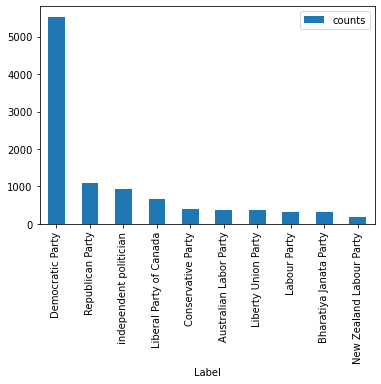

In [234]:

final[:10].plot(kind='bar',x='Label',y='counts')


In [ ]:
##

In [159]:
scores=pd.read_csv('states_scores.csv', delimiter=';')
scores

,rank,state,score,environmental,eco_friendly,climate_change,party
0,1,Vermont,76.66,1,1,32,Democratic Party
1,2,New York,75.93,4,8,5,Democratic Party
2,3,Massachusetts,74.08,3,15,2,Democratic Party
3,4,Maryland,73.51,7,5,8,Democratic Party
4,5,California,72.90,28,3,3,Democratic Party
5,6,Oregon,72.31,9,2,26,Democratic Party
6,7,Minnesota,71.96,5,7,19,Democratic Party
7,8,Hawaii,71.52,2,16,13,Democratic Party
8,9,Connecticut,69.64,11,12,1,Democratic Party
9,10,Washington,68.45,6,6,23,Democratic Party


In [153]:
governors=pd.read_csv('governors.csv', delimiter=';')
governors=governors.dropna(how='all')
governors

,state_name,state_name_slug,state_code,state_code_slug,votesmart,title,party,name,name_slug,first_name,...,address_city,address_state,address_zipcode,address_type,website,contact_page,facebook_url,twitter_handle,twitter_url,photo_url
1,Alabama,alabama,AL,al,27642.0,governor,republican,Kay Ivey,kay-ivey,Kay,...,Montgomery,AL,36130.0,Ave,https://governor.alabama.gov,https://governor.alabama.gov/contact,https://facebook.com/KayIveyAL,GovernorKayIvey,https://twitter.com/GovernorKayIvey,https://cdn.civil.services/us-governors/headsh...
3,Alaska,alaska,AK,ak,140395.0,governor,republican,Mike Dunleavy,mike-dunleavy,Mike,...,Juneau,AK,99801.0,St,https://gov.alaska.gov/,https://gov.alaska.gov/contact/,https://facebook.com/GovDunleavy,GovDunleavy,https://twitter.com/GovDunleavy,https://cdn.civil.services/us-governors/headsh...
5,Arizona,arizona,AZ,az,123548.0,governor,republican,Douglas Ducey,douglas-ducey,Douglas,...,Phoenix,AZ,85007.0,St,https://azgovernor.gov,https://azgovernor.gov/engage/form/contact-gov...,https://facebook.com/dougducey,dougducey,https://twitter.com/dougducey,https://cdn.civil.services/us-governors/headsh...
7,Arkansas,arkansas,AR,ar,732.0,governor,republican,Asa Hutchinson,asa-hutchinson,Asa,...,NaN,NaN,NaN,NaN,https://governor.arkansas.gov,https://governor.arkansas.gov/contact-info,https://facebook.com/asaforarkansas,AsaHutchinson,https://twitter.com/AsaHutchinson,https://cdn.civil.services/us-governors/headsh...
9,California,california,CA,ca,70386.0,governor,democrat,Gavin Newsom,gavin-newsom,Gavin,...,NaN,NaN,NaN,NaN,https://gov.ca.gov/,https://govapps.gov.ca.gov/gov40mail/,https://facebook.com/GavinNewsom,GavinNewsom,https://twitter.com/GavinNewsom,https://cdn.civil.services/us-governors/headsh...
11,Colorado,colorado,CO,co,106220.0,governor,democrat,Jared Polis,jared-polis,Jared,...,Denver,CO,80203.0,NaN,https://www.colorado.gov/governor/,https://www.colorado.gov/governor/contact,https://facebook.com/PolisForColorado,jaredpolis,https://twitter.com/jaredpolis,https://cdn.civil.services/us-governors/headsh...
13,Connecticut,connecticut,CT,ct,68381.0,governor,democrat,Edward Lamont,edward-lamont,Edward,...,Hartford,CT,61060.0,Ave,https://portal.ct.gov/Office-of-the-Governor,https://portal.ct.gov/Office-of-the-Governor/C...,https://facebook.com/NedLamontCT,GovNedLamont,https://twitter.com/GovNedLamont,https://cdn.civil.services/us-governors/headsh...
15,Delaware,delaware,DE,de,53658.0,governor,democrat,John Carney,john-carney,John,...,NaN,NaN,NaN,NaN,https://governor.delaware.gov,https://delaware.gov/help/degov-contact.shtml,https://facebook.com/JohnCarneyDE,johncarneyde,https://twitter.com/johncarneyde,https://cdn.civil.services/us-governors/headsh...
17,Florida,florida,FL,fl,137630.0,governor,republican,Ronald DeSantis,ronald-desantis,Ronald,...,NaN,NaN,NaN,NaN,https://www.flgov.com/,https://www.flgov.com/contact-governor/,https://facebook.com/RonDeSantisFlorida,govrondesantis,https://twitter.com/govrondesantis,https://cdn.civil.services/us-governors/headsh...
19,Georgia,georgia,GA,ga,31876.0,governor,republican,Brian Kemp,brian-kemp,Brian,...,NaN,NaN,NaN,St,https://gov.georgia.gov/,https://gov.georgia.gov/contact-us,https://facebook.com/BrianKempGA,BrianKempGA,https://twitter.com/BrianKempGA,https://cdn.civil.services/us-governors/headsh...


In [160]:
governors = governors.rename(columns={'name': 'label', 'party':'political_party', 'state_name':'state'})
governors

,state,state_name_slug,state_code,state_code_slug,votesmart,title,political_party,label,name_slug,first_name,...,address_city,address_state,address_zipcode,address_type,website,contact_page,facebook_url,twitter_handle,twitter_url,photo_url
1,Alabama,alabama,AL,al,27642.0,governor,republican,Kay Ivey,kay-ivey,Kay,...,Montgomery,AL,36130.0,Ave,https://governor.alabama.gov,https://governor.alabama.gov/contact,https://facebook.com/KayIveyAL,GovernorKayIvey,https://twitter.com/GovernorKayIvey,https://cdn.civil.services/us-governors/headsh...
3,Alaska,alaska,AK,ak,140395.0,governor,republican,Mike Dunleavy,mike-dunleavy,Mike,...,Juneau,AK,99801.0,St,https://gov.alaska.gov/,https://gov.alaska.gov/contact/,https://facebook.com/GovDunleavy,GovDunleavy,https://twitter.com/GovDunleavy,https://cdn.civil.services/us-governors/headsh...
5,Arizona,arizona,AZ,az,123548.0,governor,republican,Douglas Ducey,douglas-ducey,Douglas,...,Phoenix,AZ,85007.0,St,https://azgovernor.gov,https://azgovernor.gov/engage/form/contact-gov...,https://facebook.com/dougducey,dougducey,https://twitter.com/dougducey,https://cdn.civil.services/us-governors/headsh...
7,Arkansas,arkansas,AR,ar,732.0,governor,republican,Asa Hutchinson,asa-hutchinson,Asa,...,NaN,NaN,NaN,NaN,https://governor.arkansas.gov,https://governor.arkansas.gov/contact-info,https://facebook.com/asaforarkansas,AsaHutchinson,https://twitter.com/AsaHutchinson,https://cdn.civil.services/us-governors/headsh...
9,California,california,CA,ca,70386.0,governor,democrat,Gavin Newsom,gavin-newsom,Gavin,...,NaN,NaN,NaN,NaN,https://gov.ca.gov/,https://govapps.gov.ca.gov/gov40mail/,https://facebook.com/GavinNewsom,GavinNewsom,https://twitter.com/GavinNewsom,https://cdn.civil.services/us-governors/headsh...
11,Colorado,colorado,CO,co,106220.0,governor,democrat,Jared Polis,jared-polis,Jared,...,Denver,CO,80203.0,NaN,https://www.colorado.gov/governor/,https://www.colorado.gov/governor/contact,https://facebook.com/PolisForColorado,jaredpolis,https://twitter.com/jaredpolis,https://cdn.civil.services/us-governors/headsh...
13,Connecticut,connecticut,CT,ct,68381.0,governor,democrat,Edward Lamont,edward-lamont,Edward,...,Hartford,CT,61060.0,Ave,https://portal.ct.gov/Office-of-the-Governor,https://portal.ct.gov/Office-of-the-Governor/C...,https://facebook.com/NedLamontCT,GovNedLamont,https://twitter.com/GovNedLamont,https://cdn.civil.services/us-governors/headsh...
15,Delaware,delaware,DE,de,53658.0,governor,democrat,John Carney,john-carney,John,...,NaN,NaN,NaN,NaN,https://governor.delaware.gov,https://delaware.gov/help/degov-contact.shtml,https://facebook.com/JohnCarneyDE,johncarneyde,https://twitter.com/johncarneyde,https://cdn.civil.services/us-governors/headsh...
17,Florida,florida,FL,fl,137630.0,governor,republican,Ronald DeSantis,ronald-desantis,Ronald,...,NaN,NaN,NaN,NaN,https://www.flgov.com/,https://www.flgov.com/contact-governor/,https://facebook.com/RonDeSantisFlorida,govrondesantis,https://twitter.com/govrondesantis,https://cdn.civil.services/us-governors/headsh...
19,Georgia,georgia,GA,ga,31876.0,governor,republican,Brian Kemp,brian-kemp,Brian,...,NaN,NaN,NaN,St,https://gov.georgia.gov/,https://gov.georgia.gov/contact-us,https://facebook.com/BrianKempGA,BrianKempGA,https://twitter.com/BrianKempGA,https://cdn.civil.services/us-governors/headsh...


In [161]:

governors_inorder = pd.merge(governors, top_speakers_inorder, how='left', on='label')


In [163]:

governors_inorder=governors_inorder.sort_values(by='counts', ascending=False)
governors_inorder=governors_inorder[['state', 'label', 'counts', 'political_party']]
governors_inorder

,state,label,counts,political_party
46,Washington,Jay Inslee,483.0,democrat
4,California,Gavin Newsom,154.0,democrat
31,New York,Andrew Cuomo,56.0,democrat
5,Colorado,Jared Polis,25.0,democrat
18,Maine,Janet Mills,23.0,democrat
22,Minnesota,Tim Walz,19.0,democrat
45,Virginia,Ralph Northam,18.0,democrat
21,Michigan,Gretchen Whitmer,17.0,democrat
30,New Mexico,Michelle Lujan Grisham,11.0,democrat
27,Nevada,Steve Sisolak,9.0,democrat


In [164]:
scores_governors=pd.merge(governors_inorder, scores, how='left', on='state')

In [166]:
scores_governors

,state,label,counts,political_party,rank,score,environmental,eco_friendly,climate_change,party
0,Washington,Jay Inslee,483.0,democrat,10,68.45,6,6,23,Democratic Party
1,California,Gavin Newsom,154.0,democrat,5,72.90,28,3,3,Democratic Party
2,New York,Andrew Cuomo,56.0,democrat,2,75.93,4,8,5,Democratic Party
3,Colorado,Jared Polis,25.0,democrat,17,64.20,18,9,25,Democratic Party
4,Maine,Janet Mills,23.0,democrat,12,67.08,13,4,20,Both
5,Minnesota,Tim Walz,19.0,democrat,7,71.96,5,7,19,Democratic Party
6,Virginia,Ralph Northam,18.0,democrat,19,62.10,20,24,18,Democratic Party
7,Michigan,Gretchen Whitmer,17.0,democrat,18,62.88,14,26,17,Democratic Party
8,New Mexico,Michelle Lujan Grisham,11.0,democrat,36,50.59,46,25,33,Democratic Party
9,Nevada,Steve Sisolak,9.0,democrat,13,66.66,25,11,9,Democratic Party


In [224]:
states = geopandas.read_file('usa-states-census-2014.shp')
states=states.rename(columns={'NAME': 'state'})


In [211]:
states.crs = {"init":"epsg:3395"}

In [212]:
states=states.to_crs(epsg=3395)

<AxesSubplot:>

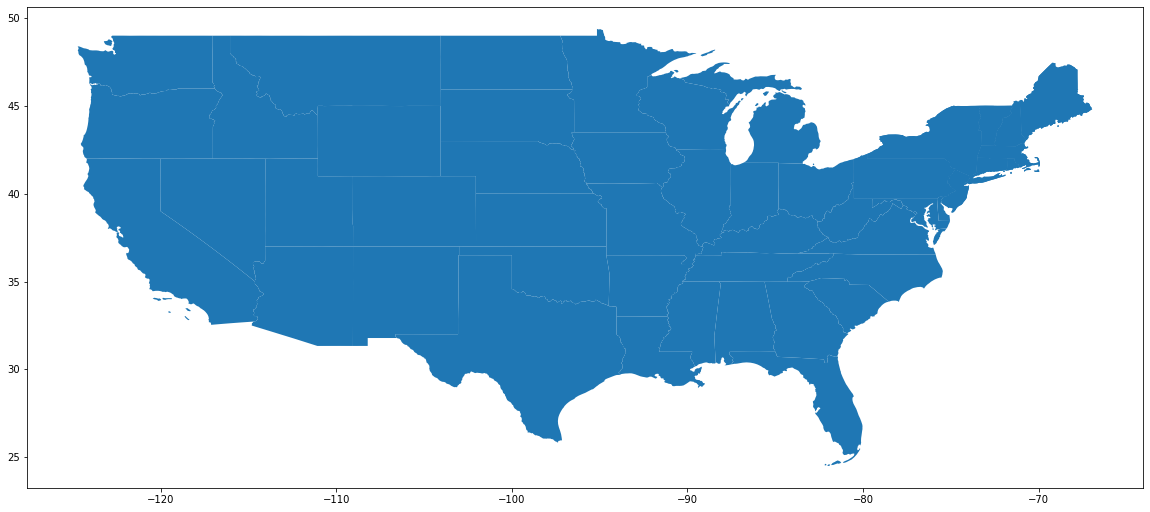

In [215]:
states.plot(figsize=(20, 10))

In [226]:
states_scores=pd.merge(states, scores_governors, how='left', on='state')

In [227]:
states_scores

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,state,LSAD,ALAND,AWATER,region,geometry,label,counts,political_party,rank,score,environmental,eco_friendly,climate_change,party
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",Gavin Newsom,154.0,democrat,5.0,72.90,28.0,3.0,3.0,Democratic Party
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",Ronald DeSantis,NaN,republican,42.0,49.45,29.0,43.0,39.0,Republican Party
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",Brian Kemp,NaN,republican,33.0,54.02,31.0,42.0,21.0,Democratic Party
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",Brad Little,NaN,republican,25.0,58.75,40.0,32.0,10.0,Republican Party
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...",J.B. Pritzker,8.0,democrat,23.0,59.34,26.0,20.0,27.0,Democratic Party
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57...",Kimberly Reynolds,NaN,republican,30.0,56.47,17.0,14.0,42.0,Republican Party
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47...",Andy Beshear,2.0,democrat,46.0,38.17,39.0,48.0,45.0,Republican Party
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-94.04305 32.69303 0.00000, -94.04...",John Edwards,1.0,democrat,49.0,26.34,48.0,50.0,49.0,Republican Party
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",Lawrence Hogan,NaN,republican,4.0,73.51,7.0,5.0,8.0,Democratic Party


(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

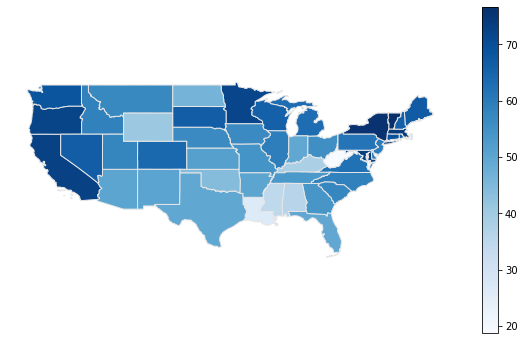

In [229]:
fig, ax = plt.subplots(1, figsize=(10,6))
states_scores.plot(column='score', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

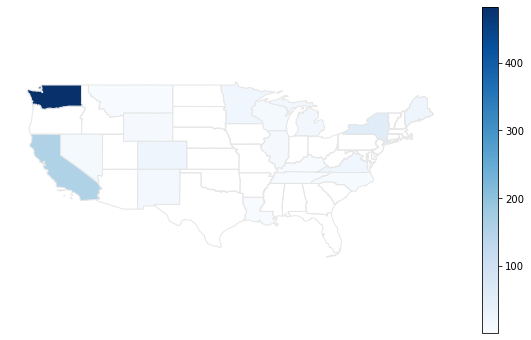

In [231]:
ig, ax = plt.subplots(1, figsize=(10,6))
states_scores.plot(column='counts', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')